In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

url = 'C:\\Users\\User\\PythonProjects\\loan_data_set.xls'

loansDS = pd.read_excel(url) 

loansDS['Total_income'] = loansDS['ApplicantIncome'] + loansDS['CoapplicantIncome']

upper_bound_98 = loansDS['Total_income'].quantile(0.98)

print("Data set size : ")
print(loansDS.shape[0])

print('Missing information:')
print(loansDS.isnull().sum())

Data set size : 
614
Missing information:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_income          0
dtype: int64


In [77]:
print(loansDS.head(10).to_string())

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  Total_income
0  LP001002   Male      No          0      Graduate            No             5849                  0         NaN             360.0             1.0         Urban           Y          5849
1  LP001003   Male     Yes          1      Graduate            No             4583               1508       128.0             360.0             1.0         Rural           N          6091
2  LP001005   Male     Yes          0      Graduate           Yes             3000                  0        66.0             360.0             1.0         Urban           Y          3000
3  LP001006   Male     Yes          0  Not Graduate            No             2583               2358       120.0             360.0             1.0         Urban           Y          4941
4  LP001008   Male      No          0      Graduate         

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

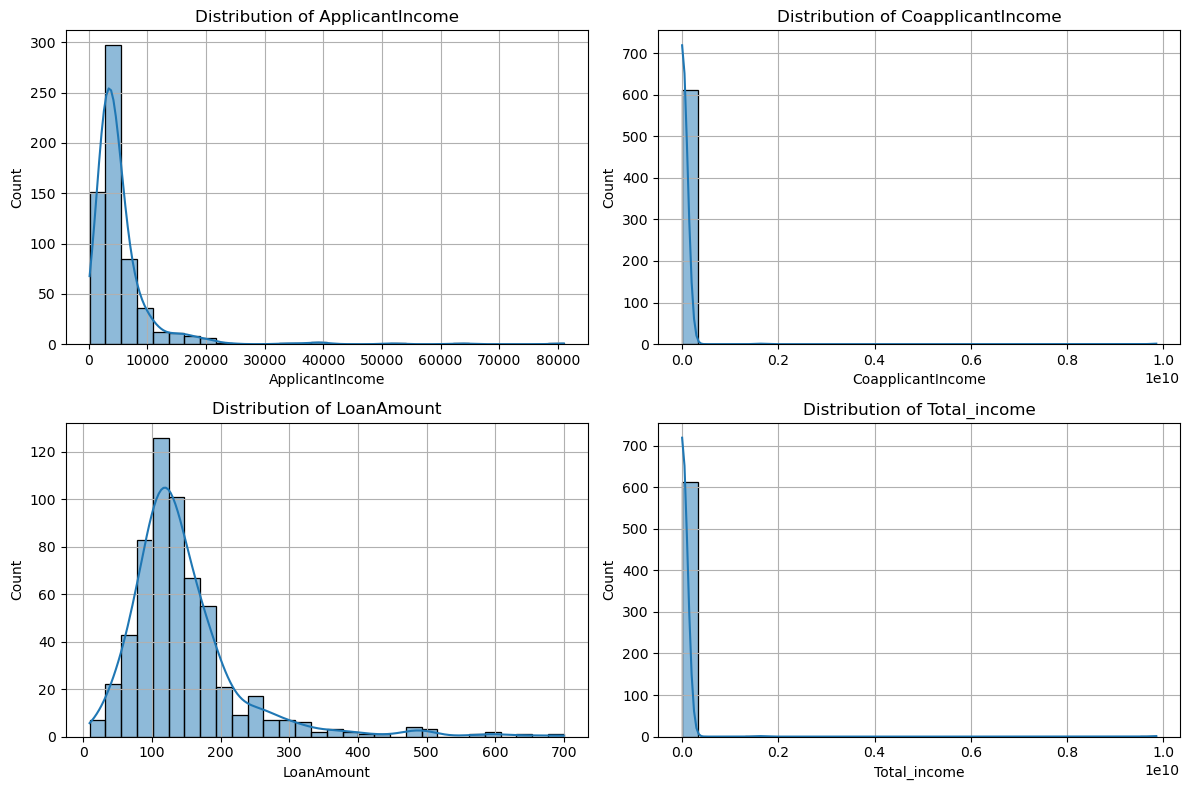

In [78]:
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_income']
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(loansDS[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.grid(True)

plt.tight_layout()
plt.show()

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

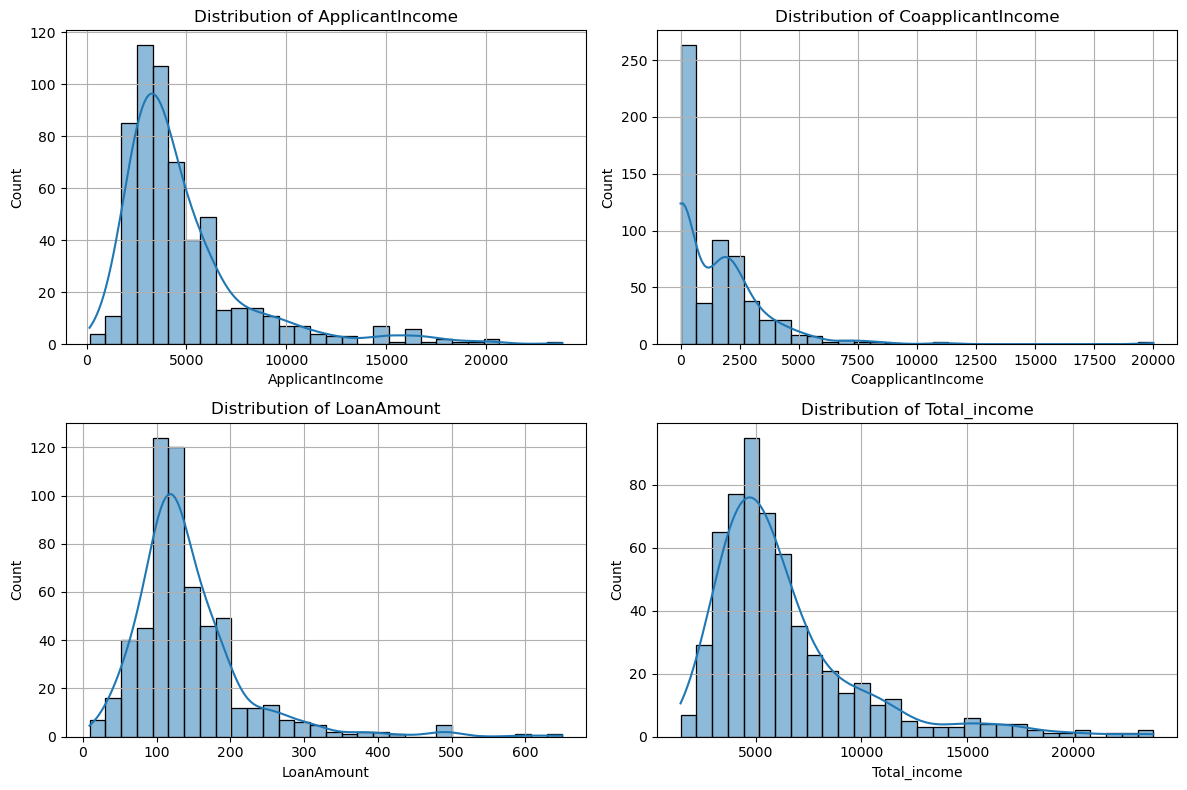

In [79]:
# Drop rows with too big Total_income
# Drop rows with NaN loan amount
# Fill NaN Credit_History with 0
cleaned_loansDS = loansDS.dropna(subset=['LoanAmount'])  \
                  .drop(loansDS[loansDS['Total_income'] > upper_bound_98].index)  \
                  .fillna({'Credit_History' : 0})  \
                  
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_income']
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(cleaned_loansDS[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.grid(True)

plt.tight_layout()
plt.show()

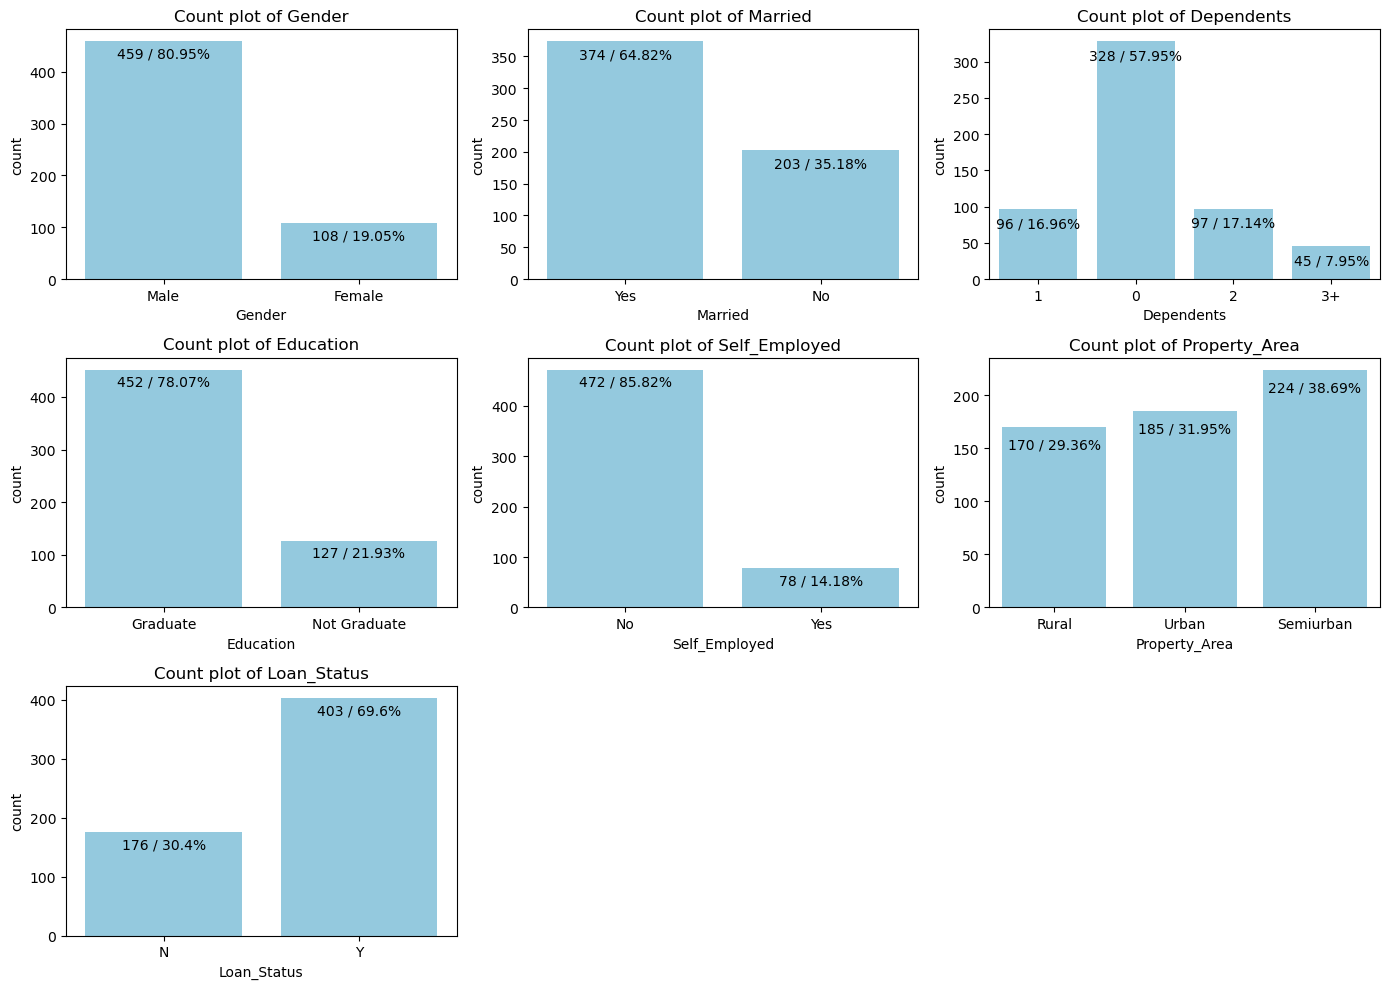

In [82]:
 # Numeric counters


categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
plt.figure(figsize=(14, 10))

for i, column in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    ax = sns.countplot(x=cleaned_loansDS[column], color="skyblue")
    plt.title(f'Count plot of {column}')
    total_height = 0
    for p in ax.patches:
        height = p.get_height()
        total_height = total_height + height
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height - 10,
                f'{height:.0f}' + ' / ' + f"{round(int(height)*100/total_height,2)}%", ha="center", va="top")

plt.tight_layout()
plt.show()


                    Gender   Married  Education  Self_Employed  LoanAmount  \
Gender            1.000000 -0.364932   0.054017       0.001490   -0.110005   
Married          -0.364932  1.000000  -0.014726       0.002040    0.139413   
Education         0.054017 -0.014726   1.000000       0.002013    0.167461   
Self_Employed     0.001490  0.002040   0.002013       1.000000    0.161339   
LoanAmount       -0.110005  0.139413   0.167461       0.161339    1.000000   
Loan_Amount_Term  0.087856 -0.099736   0.077480      -0.048713    0.103834   
Credit_History   -0.021607 -0.023772   0.084875      -0.003392   -0.004771   
Loan_Status      -0.023767  0.087336   0.076181      -0.011666   -0.035499   
Total_income     -0.128142  0.106928   0.188340       0.240901    0.688289   

                  Loan_Amount_Term  Credit_History  Loan_Status  Total_income  
Gender                    0.087856       -0.021607    -0.023767     -0.128142  
Married                  -0.099736       -0.023772     0.08

Text(0.5, 1.0, 'Correlation of numerical Variables')

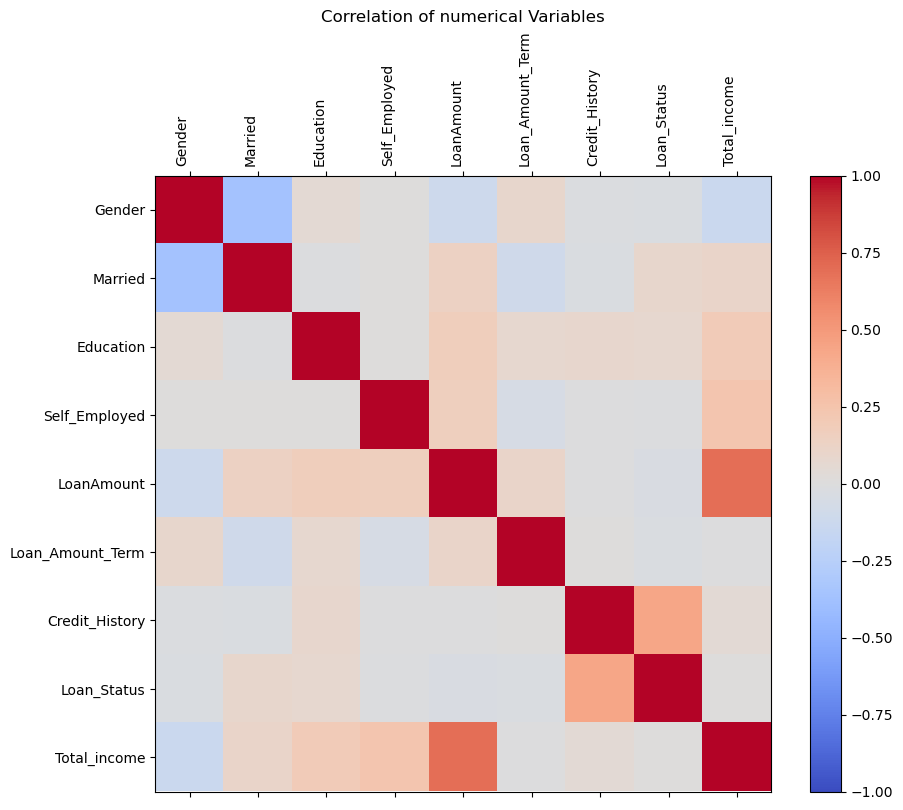

In [73]:
cleaned_loansDS['Gender'] = cleaned_loansDS['Gender'].map({'Male': 0, 'Female': 1})
cleaned_loansDS['Married'] = cleaned_loansDS['Married'].map({'No': 0, 'Yes': 1})
cleaned_loansDS["Education"]=cleaned_loansDS["Education"].map({'Not Graduate': 0, 'Graduate': 1})
cleaned_loansDS["Self_Employed"]=cleaned_loansDS["Self_Employed"].map({'No': 0, 'Yes': 1})
cleaned_loansDS["Loan_Status"]=cleaned_loansDS["Loan_Status"].map({'N': 0, 'Y': 1})
numerical_columns = cleaned_loansDS.select_dtypes(include=['number']).columns.tolist()
# Spalten, die du entfernen möchtest
columns_to_drop = ['ApplicantIncome', 'CoapplicantIncome']

# Entferne diese Spalten aus der Liste
numerical_columns = [col for col in numerical_columns if col not in columns_to_drop]
correlation_matrix=cleaned_loansDS[numerical_columns].corr()
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(10, 8))

# Definieren der Farbskala
cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=-1, vmax=1)

# Erstellen der Heatmap
cax = ax.matshow(correlation_matrix, cmap=cmap, norm=norm)

# Hinzufügen von Farbskala
fig.colorbar(cax)

# Beschriftungen der Achsen
ax.set_xticks(np.arange(len(numerical_columns)))
ax.set_yticks(np.arange(len(numerical_columns)))
ax.set_xticklabels(numerical_columns)
ax.set_yticklabels(numerical_columns)

plt.xticks(rotation=90, ha='right')


# Hinzufügen von Titeln und Labels
plt.title('Correlation of numerical Variables')


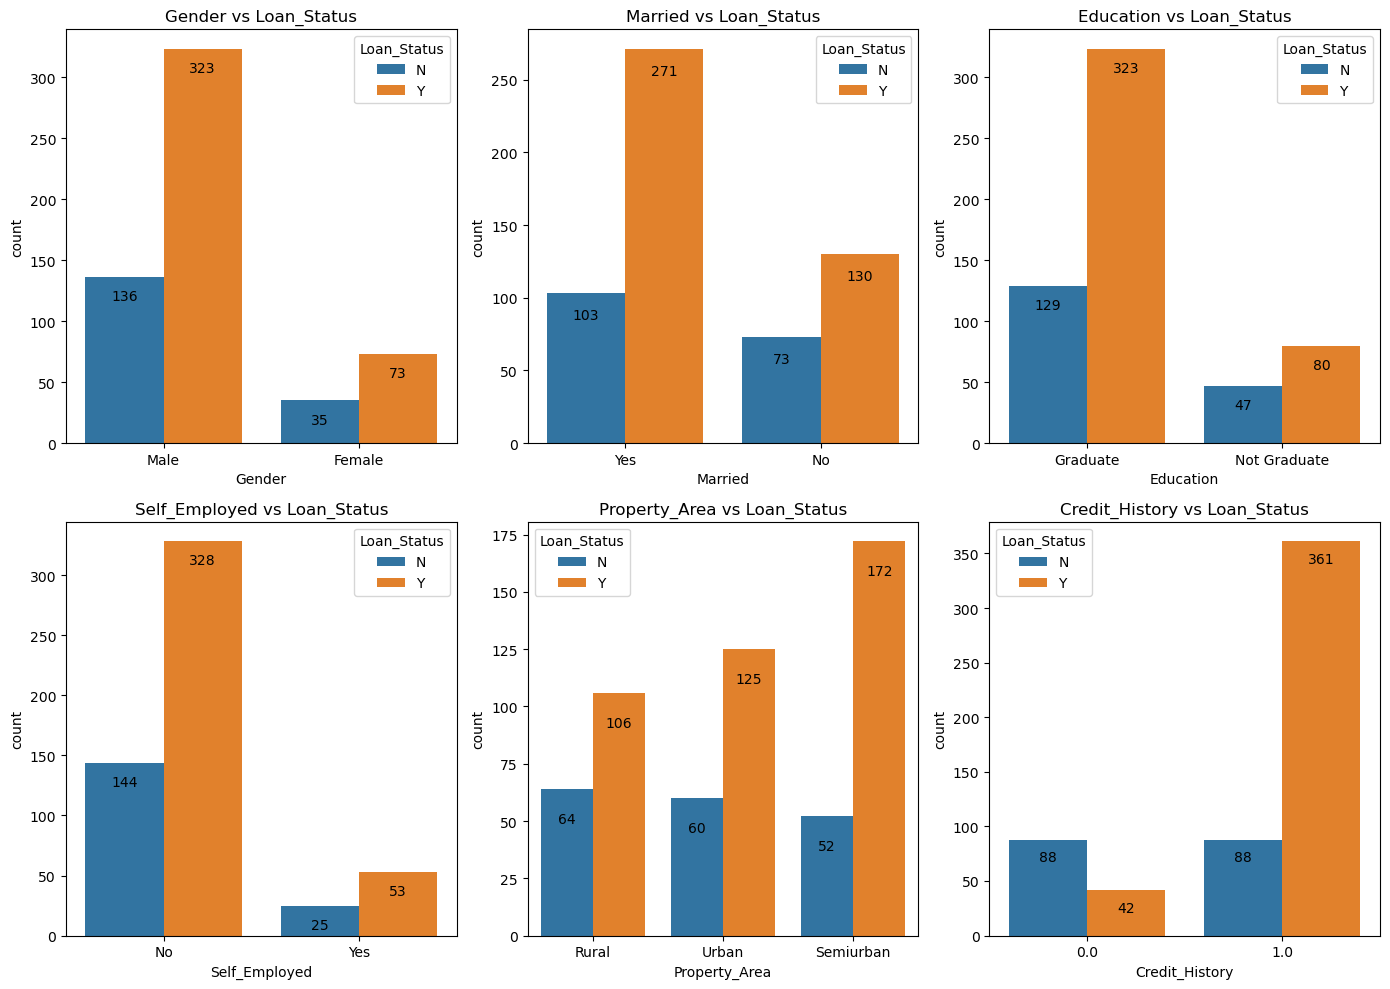

In [96]:
fairness_features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area','Credit_History']
plt.figure(figsize=(14, 10))

for i, column in enumerate(fairness_features):
    plt.subplot(2, 3, i + 1)
    ax = sns.countplot(x=column, hue='Loan_Status', data=cleaned_loansDS)
    plt.title(f'{column} vs Loan_Status')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height - 10,
                f'{height:.0f}', ha="center", va="top")

plt.tight_layout()
plt.show()

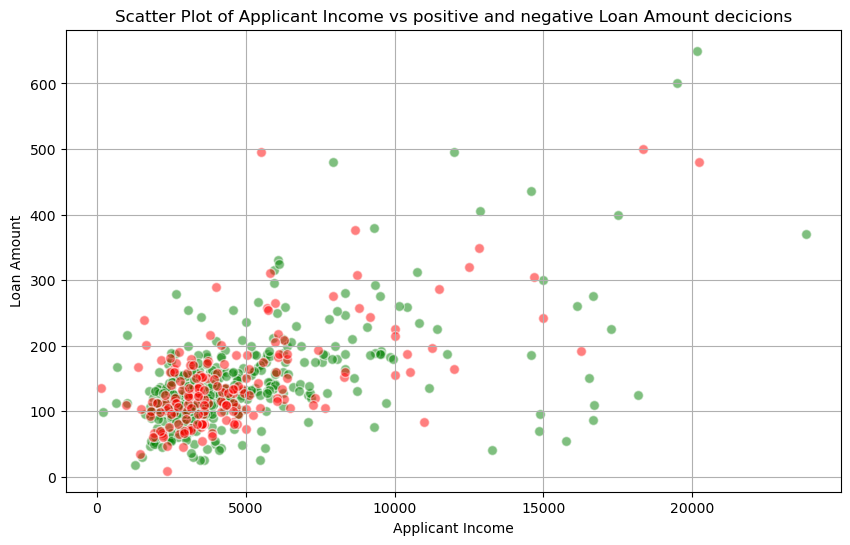

In [89]:
# Scatter diagram for all applicants

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_loansDS[cleaned_loansDS['Loan_Status'] == 'Y']['ApplicantIncome'], cleaned_loansDS[cleaned_loansDS['Loan_Status'] == 'Y']['LoanAmount'], alpha=0.5, c='green', edgecolors='w', s=50)
plt.scatter(cleaned_loansDS[cleaned_loansDS['Loan_Status'] == 'N']['ApplicantIncome'], cleaned_loansDS[cleaned_loansDS['Loan_Status'] == 'N']['LoanAmount'], alpha=0.5, c='red', edgecolors='w', s=50)
plt.title('Scatter Plot of Applicant Income vs positive and negative Loan Amount decicions')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

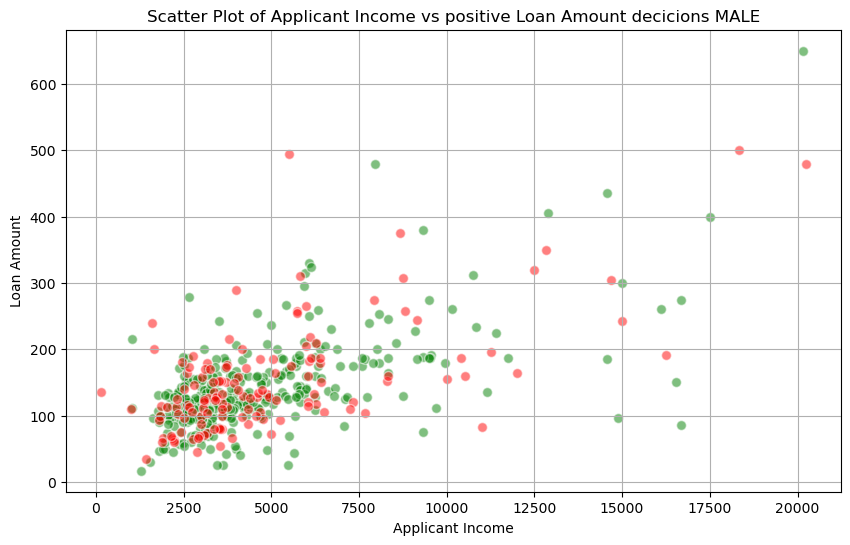

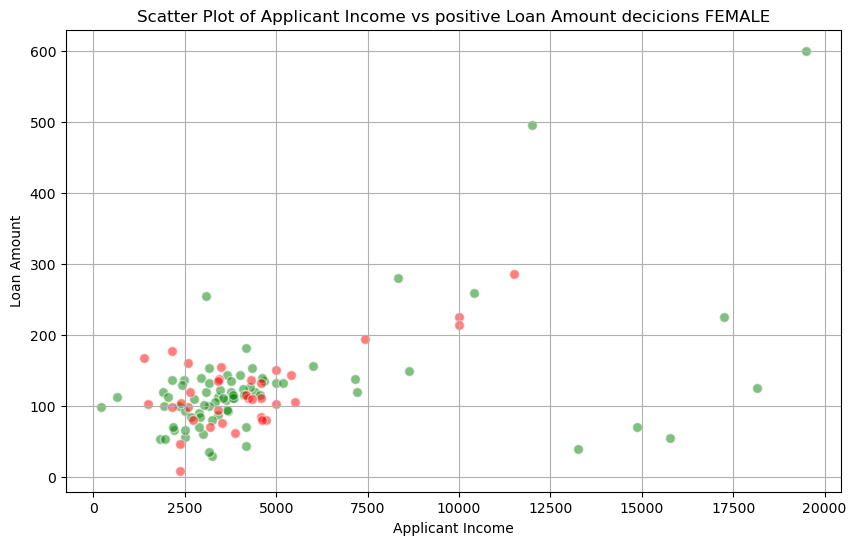

In [100]:
# Scatter diagram for all applicants

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_loansDS[(cleaned_loansDS['Loan_Status'] == 'Y') & (cleaned_loansDS['Gender'] == 'Male')]['ApplicantIncome'], cleaned_loansDS[(cleaned_loansDS['Loan_Status'] == 'Y') & (cleaned_loansDS['Gender'] == 'Male')]['LoanAmount'], alpha=0.5, c='green', edgecolors='w', s=50)
plt.scatter(cleaned_loansDS[(cleaned_loansDS['Loan_Status'] == 'N') & (cleaned_loansDS['Gender'] == 'Male')]['ApplicantIncome'], cleaned_loansDS[(cleaned_loansDS['Loan_Status'] == 'N') & (cleaned_loansDS['Gender'] == 'Male')]['LoanAmount'], alpha=0.5, c='red', edgecolors='w', s=50)
plt.title('Scatter Plot of Applicant Income vs positive Loan Amount decicions MALE')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_loansDS[(cleaned_loansDS['Loan_Status'] == 'Y') & (cleaned_loansDS['Gender'] == 'Female')]['ApplicantIncome'], cleaned_loansDS[(cleaned_loansDS['Loan_Status'] == 'Y') & (cleaned_loansDS['Gender'] == 'Female')]['LoanAmount'], alpha=0.5, c='green', edgecolors='w', s=50)
plt.scatter(cleaned_loansDS[(cleaned_loansDS['Loan_Status'] == 'N') & (cleaned_loansDS['Gender'] == 'Female')]['ApplicantIncome'], cleaned_loansDS[(cleaned_loansDS['Loan_Status'] == 'N') & (cleaned_loansDS['Gender'] == 'Female')]['LoanAmount'], alpha=0.5, c='red', edgecolors='w', s=50)
plt.title('Scatter Plot of Applicant Income vs positive Loan Amount decicions FEMALE')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

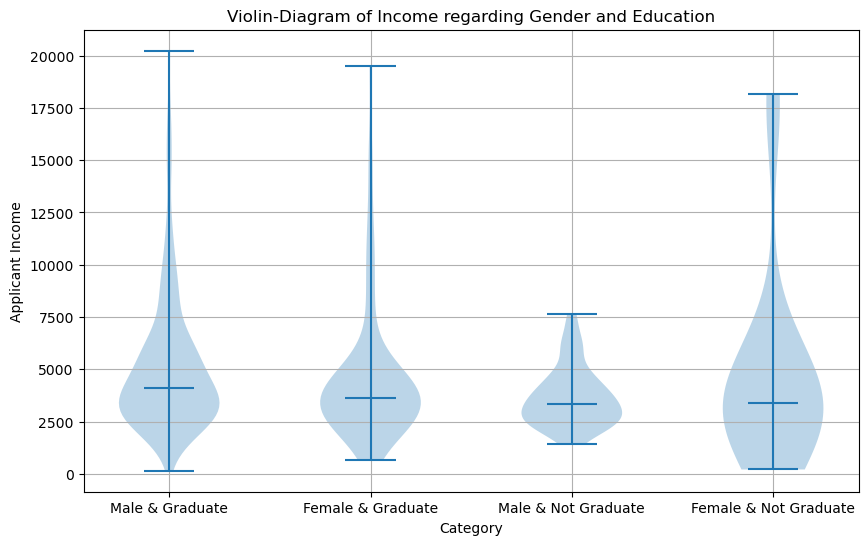

In [97]:
income_male_grad = cleaned_loansDS[(cleaned_loansDS["Gender"] == 'Male') & (cleaned_loansDS['Education'] == 'Graduate')]['ApplicantIncome']
income_female_grad = cleaned_loansDS[(cleaned_loansDS["Gender"] == 'Female') & (cleaned_loansDS['Education'] == 'Graduate')]['ApplicantIncome']
income_male_nograd = cleaned_loansDS[(cleaned_loansDS["Gender"] == 'Male') & (cleaned_loansDS['Education'] == 'Not Graduate')]['ApplicantIncome']
income_female_nograd = cleaned_loansDS[(cleaned_loansDS["Gender"] == 'Female') & (cleaned_loansDS['Education'] == 'Not Graduate')]['ApplicantIncome']
plt.figure(figsize=(10, 6))
plt.violinplot([income_male_grad, income_female_grad, income_male_nograd, income_female_nograd], showmeans=False, showmedians=True)
plt.xticks([1, 2, 3, 4], ['Male & Graduate', 'Female & Graduate', 'Male & Not Graduate', 'Female & Not Graduate'])
plt.title('Violin-Diagram of Income regarding Gender and Education')
plt.xlabel('Category')
plt.ylabel('Applicant Income')
plt.grid(True)
plt.show()

In [109]:
# Separate features data set
# Add Total_income column
cleaned_loansDS_features = cleaned_loansDS[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status']]
cleaned_loansDS_features['Total_income'] = cleaned_loansDS_features['ApplicantIncome'] + cleaned_loansDS_features['CoapplicantIncome']

# Fill NaN Loan_Amount_Term with mean amount
median_Loan_Amount_Term = cleaned_loansDS_features['Loan_Amount_Term'].median()
cleaned_loansDS_features = cleaned_loansDS_features.fillna({'Loan_Amount_Term' : median_Loan_Amount_Term})

# Replace Loan_Status with 0...1
cleaned_loansDS_features['Loan_Status'] = cleaned_loansDS_features['Loan_Status'].replace({'Y': 1, 'N': 0})

# Drop rows with Total_income > 30000 - leads to loosing 5 positive cases, but makes datamore readable - optional
cleaned_loansDS_features = cleaned_loansDS_features.drop(cleaned_loansDS_features[cleaned_loansDS_features['Total_income'] > 30000].index)

# Define training data
x = cleaned_loansDS_features[['Total_income' ,'LoanAmount', 'Credit_History', 'Loan_Amount_Term']]
y = cleaned_loansDS_features['Loan_Status']

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x , y , random_state = 0)


C:\Users\User\AppData\Local\Temp\ipykernel_4632\568628878.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_loansDS_features['Total_income'] = cleaned_loansDS_features['ApplicantIncome'] + cleaned_loansDS_features['CoapplicantIncome']


In [110]:
from sklearn.ensemble import RandomForestClassifier

# Dictionary to return yes/no 
lookup_loan_status = {1 : 'yes', 0 : 'no'}
rf_classifier = RandomForestClassifier(n_estimators = 100,  # Amount of trees
                                       criterion = 'gini',  # assesment creterium
                                       max_depth = None,    # max model depth
                                       random_state = 0) 

rf_classifier.fit(X_train, y_train)

accuracy = rf_classifier.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

loan_status = rf_classifier.predict([[12500, 50, 1, 120]])
print(lookup_loan_status[loan_status[0]])

Accuracy: 0.7448275862068966
yes


c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
loan_status_counts = cleaned_loansDS['Loan_Status'].value_counts()

plt.figure(figsize=(3, 4))
bars = plt.bar(loan_status_counts.index.astype(str), loan_status_counts.values)
plt.title('Dependents Loan Status')
plt.ylabel('Dependents amount')
plt.xlabel('Loan Status')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval -50, int(yval), ha='center', va='bottom')
plt.show()

property_area_counts = cleaned_loansDS['Property_Area'].value_counts()

plt.figure(figsize=(4, 4))
bars = plt.bar(property_area_counts.index.astype(str), property_area_counts.values)
plt.title('Applicants Area Type Counts')
plt.ylabel('Applicants amount')
plt.xlabel('Area Type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval -50, int(yval), ha='center', va='bottom')
plt.show()

credit_history_counts = cleaned_loansDS['Credit_History'].value_counts()

plt.figure(figsize=(3, 4))
bars = plt.bar(credit_history_counts.index.astype(str), credit_history_counts.values)
plt.title('Applicants credit history counts')
plt.ylabel('Applicants amount')
plt.xlabel('Credit History')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval -50, int(yval), ha='center', va='bottom')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(cleaned_loansDS['Loan_Amount_Term'], bins=8, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Amount Terminations')
plt.xlabel('Loan Amount Termination')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(cleaned_loansDS['LoanAmount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.show()

self_employed_counts = cleaned_loansDS['Self_Employed'].value_counts()

plt.figure(figsize=(3, 4))
bars = plt.bar(self_employed_counts.index.astype(str), self_employed_counts.values)
plt.title('Applicants self employed counts')
plt.ylabel('Applicants amount')
plt.xlabel('Self employed')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval -50, int(yval), ha='center', va='bottom')
plt.show()

education_status_counts = cleaned_loansDS['Education'].value_counts()

plt.figure(figsize=(3, 4))
bars = plt.bar(education_status_counts.index.astype(str), education_status_counts.values)
plt.title('Applicants education counts')
plt.ylabel('Applicants amount')
plt.xlabel('education')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval -50, int(yval), ha='center', va='bottom')
plt.show()


dependents_status_counts = cleaned_loansDS['Dependents'].value_counts()

plt.figure(figsize=(3, 4))
bars = plt.bar(dependents_status_counts.index.astype(str), dependents_status_counts.values)
plt.title('Dependents status counts')
plt.xlabel('Dependents amount')
plt.ylabel('Number of Applicants')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval -25, int(yval), ha='center', va='bottom')
plt.show()


married_counts = cleaned_loansDS['Married'].value_counts()

plt.figure(figsize=(3, 4))
bars = plt.bar(married_counts.index, married_counts.values)
plt.title('Number of Married Applicants')
plt.xlabel('Married')
plt.ylabel('Number of Applicants')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval -50, int(yval), ha='center', va='bottom')
plt.show()
